In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

plt.rc("font", size = 20)

In [2]:
data = pd.read_csv('analysis_data_test.csv')
data['shopper_creation_timestamp_pst'] = pd.to_datetime(data['shopper_creation_timestamp_pst'])
data['net_revenue'] = data['partner_revenue'] + data['policy_value']
data.head()
#netvalue = data
#netvalue['net_value'] = netvalue['partner_revenue'] + netvalue['policy_value']
#netvalue = netvalue.drop(['partner_revenue', 'policy_value'], axis = 1)



,marketing_source,shopper_creation_timestamp_pst,shopper_id,number_calls_answered,number_calls_longer_than_200seconds,partner_revenue,marketing_cost,policies_submitted,policy_value,net_revenue
0,AH,2018-05-01 06:22:00,4611274,0,0,0.00,0.0,0,0.0,0.00
1,AJ,2018-05-03 04:24:00,4657039,1,0,3.69,0.0,0,0.0,3.69
2,BG,2018-05-06 16:38:00,4717844,0,0,9.60,4.0,0,0.0,9.60
3,BD,2018-05-10 21:39:00,4812602,0,0,0.00,0.0,0,0.0,0.00
4,Unknown,2018-05-21 09:05:00,5000656,0,0,0.00,0.0,0,0.0,0.00


In [3]:
good_source = data
good_source = data.drop(['shopper_creation_timestamp_pst', 'policy_value', 'partner_revenue', 'shopper_id'], axis = 1)
good_source.head()

,marketing_source,number_calls_answered,number_calls_longer_than_200seconds,marketing_cost,policies_submitted,net_revenue
0,AH,0,0,0.0,0,0.00
1,AJ,1,0,0.0,0,3.69
2,BG,0,0,4.0,0,9.60
3,BD,0,0,0.0,0,0.00
4,Unknown,0,0,0.0,0,0.00


In [4]:
good_source['sold'] = 0
good_source['Total Traffic'] = 1
for i in range(len(good_source)):
    if good_source['net_revenue'][i] > 0:
        good_source['sold'][i] = 1

<ipython-input-4-9f23470671d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_source['sold'][i] = 1


In [5]:
good_source.head()

,marketing_source,number_calls_answered,number_calls_longer_than_200seconds,marketing_cost,policies_submitted,net_revenue,sold,Total Traffic
0,AH,0,0,0.0,0,0.00,0,1
1,AJ,1,0,0.0,0,3.69,1,1
2,BG,0,0,4.0,0,9.60,1,1
3,BD,0,0,0.0,0,0.00,0,1
4,Unknown,0,0,0.0,0,0.00,0,1


In [6]:
good_source['sold'].value_counts()

0    731245
1    317330
Name: sold, dtype: int64

In [7]:
count_no_sold = len(good_source[good_source['sold'] == 0])
count_sold = len(good_source[good_source['sold'] == 1])
pct_sold = count_sold / (count_no_sold + count_sold)
pct_not_sold = count_no_sold / (count_sold + count_no_sold)
total = count_sold+count_no_sold
print('percent sold:', pct_sold*100)
print('percent not sold:', pct_not_sold*100)

percent sold: 30.262975943542425
percent not sold: 69.73702405645757


In [8]:
good_source.groupby('sold').mean()

,number_calls_answered,number_calls_longer_than_200seconds,marketing_cost,policies_submitted,net_revenue,Total Traffic
sold,,,,,,
0,1.237528,0.144259,4.546315,0.001101,-0.052013,1.0
1,1.290820,0.178511,7.662495,0.046642,27.890469,1.0


In [9]:
good_source_mean = good_source.groupby('marketing_source').mean().sort_values('number_calls_answered',
                                                                              ascending=False)
good_source_mean

,number_calls_answered,number_calls_longer_than_200seconds,marketing_cost,policies_submitted,net_revenue,sold,Total Traffic
marketing_source,,,,,,,
A,6.569767,1.886047,0.000000,0.981395,365.728484,0.909302,1.0
AU,1.607759,0.202586,14.012414,0.017241,10.547448,0.586207,1.0
K,1.550388,0.167959,0.000000,0.018088,7.154096,0.211886,1.0
Unknown,1.533138,0.410871,0.000000,0.001570,1.084668,0.071560,1.0
AV,1.520523,0.184889,15.197868,0.030149,18.842394,0.391573,1.0
...,...,...,...,...,...,...,...
H,1.017687,0.111565,11.685728,0.010884,7.534820,0.474830,1.0
AD,1.001990,0.098289,0.000000,0.019101,12.848271,0.493036,1.0
I,0.925121,0.115942,21.412778,0.019324,9.679002,0.301932,1.0


In [10]:
count_by_source_tab = good_source.groupby('marketing_source').count().sort_values('Total Traffic', ascending=False)
count_by_source_tab = count_by_source_tab.drop(['number_calls_answered', 'number_calls_longer_than_200seconds', 'marketing_cost',
                                               'policies_submitted', 'net_revenue', 'sold'], axis = 1)
count_by_source_tab['Total'] = count_by_source_tab['Total Traffic'].sum()
count_by_source_tab['percent_of_traffic'] = (count_by_source_tab['Total Traffic']/count_by_source_tab['Total'])*100
count_by_source_tab


,Total Traffic,Total,percent_of_traffic
marketing_source,,,
U,267024,1048575,25.465417
Unknown,140791,1048575,13.426889
BI,107581,1048575,10.259733
AH,99377,1048575,9.477338
O,80049,1048575,7.634075
...,...,...,...
AA,229,1048575,0.021839
E,213,1048575,0.020313
BF,203,1048575,0.019360


In [11]:
count_bySource = count_by_source_tab.drop('Total', axis = 1)
count_bySource

,Total Traffic,percent_of_traffic
marketing_source,,
U,267024,25.465417
Unknown,140791,13.426889
BI,107581,10.259733
AH,99377,9.477338
O,80049,7.634075
...,...,...
AA,229,0.021839
E,213,0.020313
BF,203,0.019360


In [12]:
count_by_source_tab_removed = count_bySource[count_bySource['percent_of_traffic'] > 1]
count_by_source_tab_removed
#Around 82% of total traffic, the rest is insignificant

,Total Traffic,percent_of_traffic
marketing_source,,
U,267024,25.465417
Unknown,140791,13.426889
BI,107581,10.259733
AH,99377,9.477338
O,80049,7.634075
AW,46535,4.437928
BG,34348,3.275684
BD,30867,2.943709
S,24443,2.331068


In [13]:
good_source_mean.loc['A'] 

number_calls_answered                    6.569767
number_calls_longer_than_200seconds      1.886047
marketing_cost                           0.000000
policies_submitted                       0.981395
net_revenue                            365.728484
sold                                     0.909302
Total Traffic                            1.000000
Name: A, dtype: float64

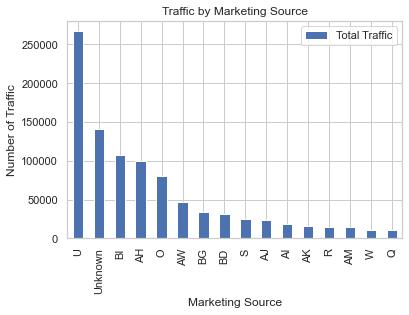

In [14]:
%matplotlib inline
new = count_by_source_tab_removed.plot(y = ['Total Traffic'], use_index=True, kind='bar')
new.plot(kind='bar', figsize=(20,10))
plt.title('Traffic by Marketing Source')
plt.xlabel('Marketing Source')
plt.ylabel('Number of Traffic')
plt.savefig('traffic_by_marketing_source')

Take a look at source: U, unknown, AH, AW, BI [Looks like they make the majority of the traffic coming into Sales]


In [15]:
good_source_mean['Traffic'] = count_by_source_tab['Total Traffic']
good_source_mean['percent_of_traffic'] = count_by_source_tab['percent_of_traffic']
source_mean82 = good_source_mean[good_source_mean['percent_of_traffic'] > 1].sort_values('Traffic', ascending=False)
source_mean82

,number_calls_answered,number_calls_longer_than_200seconds,marketing_cost,policies_submitted,net_revenue,sold,Total Traffic,Traffic,percent_of_traffic
marketing_source,,,,,,,,,
U,1.181452,0.079000,3.180348,0.012029,5.365302,0.216613,1.0,267024,25.465417
Unknown,1.533138,0.410871,0.000000,0.001570,1.084668,0.071560,1.0,140791,13.426889
BI,1.162938,0.144161,9.658127,0.021296,13.974784,0.442188,1.0,107581,10.259733
AH,1.191976,0.129628,0.000000,0.016583,9.910137,0.330086,1.0,99377,9.477338
O,1.192282,0.076291,5.194704,0.013991,6.152358,0.228548,1.0,80049,7.634075
AW,1.294424,0.137660,9.825296,0.017449,8.544078,0.318341,1.0,46535,4.437928
BG,1.157680,0.095319,7.477515,0.015896,9.000663,0.431786,1.0,34348,3.275684
BD,1.235689,0.074513,0.005420,0.010821,4.743315,0.161856,1.0,30867,2.943709
S,1.272880,0.165160,16.394689,0.020578,16.513787,0.638710,1.0,24443,2.331068


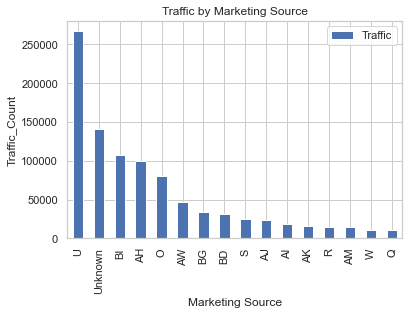

In [16]:
source_mean82.plot(y = ['Traffic'], kind='bar')
plt.title('Traffic by Marketing Source')
plt.xlabel('Marketing Source')
plt.ylabel('Traffic_Count')
plt.savefig('traffic_by_marketing_source')

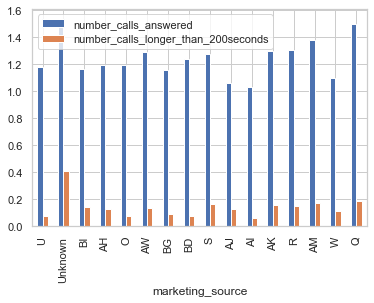

In [17]:
source_mean82.plot(y = ['number_calls_answered', 'number_calls_longer_than_200seconds'], kind='bar')

In [18]:
source_mean82.loc['U'] 

number_calls_answered                       1.181452
number_calls_longer_than_200seconds         0.079000
marketing_cost                              3.180348
policies_submitted                          0.012029
net_revenue                                 5.365302
sold                                        0.216613
Total Traffic                               1.000000
Traffic                                267024.000000
percent_of_traffic                         25.465417
Name: U, dtype: float64

Looking at U who is 25% of all traffic, looks like it isn't a great source due to the lack of calls longer than 200 seconds.

In [19]:
source_mean82.loc['Unknown']

number_calls_answered                       1.533138
number_calls_longer_than_200seconds         0.410871
marketing_cost                              0.000000
policies_submitted                          0.001570
net_revenue                                 1.084668
sold                                        0.071560
Total Traffic                               1.000000
Traffic                                140791.000000
percent_of_traffic                         13.426889
Name: Unknown, dtype: float64

In [20]:
good_source_mean.loc['A'] 

number_calls_answered                    6.569767
number_calls_longer_than_200seconds      1.886047
marketing_cost                           0.000000
policies_submitted                       0.981395
net_revenue                            365.728484
sold                                     0.909302
Total Traffic                            1.000000
Traffic                                430.000000
percent_of_traffic                       0.041008
Name: A, dtype: float64

In [21]:
high_call_average = good_source.groupby('marketing_source').mean().sort_values('number_calls_longer_than_200seconds',
                                                                              ascending=False)
high_call_average['Total Traffic'] = count_by_source_tab['Total Traffic']
high_call_average['percent_of_traffic'] = count_by_source_tab['percent_of_traffic']
high_call_average = high_call_average.drop(['marketing_cost', 'policies_submitted', 'net_revenue', 'sold'], axis = 1)
high_call_average

,number_calls_answered,number_calls_longer_than_200seconds,Total Traffic,percent_of_traffic
marketing_source,,,,
A,6.569767,1.886047,430,0.041008
Unknown,1.533138,0.410871,140791,13.426889
AP,1.244382,0.266854,356,0.033951
AC,1.437887,0.236430,2745,0.261784
AE,1.412509,0.235762,6795,0.648022
...,...,...,...,...
O,1.192282,0.076291,80049,7.634075
BD,1.235689,0.074513,30867,2.943709
AI,1.031286,0.062517,18347,1.749708


In [22]:
high_call_average['number_of_calls_that_turned_into_200Seconds'] = 100*(high_call_average['number_calls_longer_than_200seconds']
                                                                        /high_call_average['number_calls_answered'])
high_call_average


,number_calls_answered,number_calls_longer_than_200seconds,Total Traffic,percent_of_traffic,number_of_calls_that_turned_into_200Seconds
marketing_source,,,,,
A,6.569767,1.886047,430,0.041008,28.707965
Unknown,1.533138,0.410871,140791,13.426889,26.799381
AP,1.244382,0.266854,356,0.033951,21.444695
AC,1.437887,0.236430,2745,0.261784,16.442868
AE,1.412509,0.235762,6795,0.648022,16.690977
...,...,...,...,...,...
O,1.192282,0.076291,80049,7.634075,6.398718
BD,1.235689,0.074513,30867,2.943709,6.030098
AI,1.031286,0.062517,18347,1.749708,6.062047


In [23]:

high_call_average_20percent = high_call_average[high_call_average['number_of_calls_that_turned_into_200Seconds'] >= 16].sort_values('Total Traffic', ascending=False)
high_call_average_20percent

,number_calls_answered,number_calls_longer_than_200seconds,Total Traffic,percent_of_traffic,number_of_calls_that_turned_into_200Seconds
marketing_source,,,,,
Unknown,1.533138,0.410871,140791,13.426889,26.799381
AE,1.412509,0.235762,6795,0.648022,16.690977
AC,1.437887,0.236430,2745,0.261784,16.442868
T,1.051975,0.172557,481,0.045872,16.403162
A,6.569767,1.886047,430,0.041008,28.707965
AP,1.244382,0.266854,356,0.033951,21.444695
D,0.920398,0.159204,201,0.019169,17.297297


In [24]:
source_mean82['percent_of calls_200Seconds+'] = 100*(source_mean82['number_calls_longer_than_200seconds']
                                                                        /source_mean82['number_calls_answered'])
source_mean82 = source_mean82.drop(['marketing_cost', 'policies_submitted', 'net_revenue', 'sold', 'Total Traffic'], axis = 1)
source_mean82

,number_calls_answered,number_calls_longer_than_200seconds,Traffic,percent_of_traffic,percent_of calls_200Seconds+
marketing_source,,,,,
U,1.181452,0.079000,267024,25.465417,6.686721
Unknown,1.533138,0.410871,140791,13.426889,26.799381
BI,1.162938,0.144161,107581,10.259733,12.396291
AH,1.191976,0.129628,99377,9.477338,10.875016
O,1.192282,0.076291,80049,7.634075,6.398718
AW,1.294424,0.137660,46535,4.437928,10.634836
BG,1.157680,0.095319,34348,3.275684,8.233578
BD,1.235689,0.074513,30867,2.943709,6.030098
S,1.272880,0.165160,24443,2.331068,12.975284


In [25]:
source_mean82.loc['U']

number_calls_answered                       1.181452
number_calls_longer_than_200seconds         0.079000
Traffic                                267024.000000
percent_of_traffic                         25.465417
percent_of calls_200Seconds+                6.686721
Name: U, dtype: float64

In [26]:
source_mean82.loc['Unknown']

number_calls_answered                       1.533138
number_calls_longer_than_200seconds         0.410871
Traffic                                140791.000000
percent_of_traffic                         13.426889
percent_of calls_200Seconds+               26.799381
Name: Unknown, dtype: float64

In [27]:
source_mean82_20percent = source_mean82[source_mean82['percent_of calls_200Seconds+'] >= 16].sort_values('Traffic', ascending=False)
source_mean82_20percent

,number_calls_answered,number_calls_longer_than_200seconds,Traffic,percent_of_traffic,percent_of calls_200Seconds+
marketing_source,,,,,
Unknown,1.533138,0.410871,140791,13.426889,26.799381


In [28]:
may_data = data[data['shopper_creation_timestamp_pst'].apply(lambda x: x.month == 5)]
june_data = data[data['shopper_creation_timestamp_pst'].apply(lambda x: x.month == 6)]
july_data = data[data['shopper_creation_timestamp_pst'].apply(lambda x: x.month == 7)]
aug_data = data[data['shopper_creation_timestamp_pst'].apply(lambda x: x.month == 8)]
may_data = may_data.reset_index()
june_data = june_data.reset_index()
july_data = july_data.reset_index()
aug_data = aug_data.reset_index()

In [29]:
may_data = may_data.drop(['shopper_creation_timestamp_pst', 'policy_value', 'partner_revenue', 'shopper_id'], axis = 1)
june_data = june_data.drop(['shopper_creation_timestamp_pst', 'policy_value', 'partner_revenue', 'shopper_id'], axis = 1)
july_data = july_data.drop(['shopper_creation_timestamp_pst', 'policy_value', 'partner_revenue', 'shopper_id'], axis = 1)
aug_data = aug_data.drop(['shopper_creation_timestamp_pst', 'policy_value', 'partner_revenue', 'shopper_id'], axis = 1)

In [30]:
may_data['sold'] = 0
may_data['Total Traffic'] = 1
for i in range(len(may_data)):
    if may_data['net_revenue'][i] > 0:
        may_data['sold'][i] = 1

june_data['sold'] = 0
june_data['Total Traffic'] = 1
for i in range(len(june_data)):
    if june_data['net_revenue'][i] > 0:
        june_data['sold'][i] = 1

july_data['sold'] = 0
july_data['Total Traffic'] = 1
for i in range(len(july_data)):
    if july_data['net_revenue'][i] > 0:
        july_data['sold'][i] = 1

aug_data['sold'] = 0
aug_data['Total Traffic'] = 1
for i in range(len(aug_data)):
    if aug_data['net_revenue'][i] > 0:
        aug_data['sold'][i] = 1

<ipython-input-30-5022a6d392d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_data['sold'][i] = 1
<ipython-input-30-5022a6d392d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_data['sold'][i] = 1
<ipython-input-30-5022a6d392d5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_data['sold'][i] = 1
<ipython-input-30-5022a6d392d5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [31]:
may_count = may_data.groupby('marketing_source').count().sort_values('Total Traffic', ascending=False)
may_count = may_count.drop(['number_calls_answered', 'number_calls_longer_than_200seconds', 'marketing_cost',
                                               'policies_submitted', 'net_revenue', 'sold'], axis = 1)
may_count['Total'] = may_count['Total Traffic'].sum()
may_count['percent_of_traffic'] = (may_count['Total Traffic']/may_count['Total'])*100
may_count_sig = may_count[may_count['percent_of_traffic'] > 1]
may_count_sig

,index,Total Traffic,Total,percent_of_traffic
marketing_source,,,,
Unknown,28744,28744,187778,15.307438
BI,21034,21034,187778,11.201525
U,17476,17476,187778,9.306735
O,13985,13985,187778,7.447624
BG,12476,12476,187778,6.644016
AW,12188,12188,187778,6.490643
AH,12113,12113,187778,6.450702
Q,10947,10947,187778,5.829756
BD,8850,8850,187778,4.713012


In [32]:
june_count = june_data.groupby('marketing_source').count().sort_values('Total Traffic', ascending=False)
june_count = june_count.drop(['number_calls_answered', 'number_calls_longer_than_200seconds', 'marketing_cost',
                                               'policies_submitted', 'net_revenue', 'sold'], axis = 1)
june_count['Total'] = june_count['Total Traffic'].sum()
june_count['percent_of_traffic'] = (june_count['Total Traffic']/june_count['Total'])*100
june_count_sig = june_count[june_count['percent_of_traffic'] > 1]
june_count_sig

,index,Total Traffic,Total,percent_of_traffic
marketing_source,,,,
Unknown,54768,54768,219432,24.958985
U,32846,32846,219432,14.968646
O,23035,23035,219432,10.497557
BI,21014,21014,219432,9.576543
AH,18209,18209,219432,8.298243
AW,10575,10575,219432,4.819261
BG,8188,8188,219432,3.731452
BD,5475,5475,219432,2.495078
S,5289,5289,219432,2.410314


In [33]:
july_count = july_data.groupby('marketing_source').count().sort_values('Total Traffic', ascending=False)
july_count = july_count.drop(['number_calls_answered', 'number_calls_longer_than_200seconds', 'marketing_cost',
                                               'policies_submitted', 'net_revenue', 'sold'], axis = 1)
july_count['Total'] = july_count['Total Traffic'].sum()
july_count['percent_of_traffic'] = (july_count['Total Traffic']/july_count['Total'])*100
july_count_sig = july_count[july_count['percent_of_traffic'] > 1]
july_count_sig

,index,Total Traffic,Total,percent_of_traffic
marketing_source,,,,
U,79979,79979,292824,27.312993
BI,31163,31163,292824,10.642229
AH,29139,29139,292824,9.951029
Unknown,27595,27595,292824,9.423749
O,26538,26538,292824,9.062782
AW,16571,16571,292824,5.659031
BG,9902,9902,292824,3.381553
BD,7450,7450,292824,2.544190
AK,6798,6798,292824,2.321531


In [34]:
aug_count = aug_data.groupby('marketing_source').count().sort_values('Total Traffic', ascending=False)
aug_count = aug_count.drop(['number_calls_answered', 'number_calls_longer_than_200seconds', 'marketing_cost',
                                               'policies_submitted', 'net_revenue', 'sold'], axis = 1)
aug_count['Total'] = aug_count['Total Traffic'].sum()
aug_count['percent_of_traffic'] = (aug_count['Total Traffic']/aug_count['Total'])*100
aug_count_sig = aug_count[aug_count['percent_of_traffic'] > 1]
aug_count_sig

,index,Total Traffic,Total,percent_of_traffic
marketing_source,,,,
U,136723,136723,348541,39.227236
AH,39916,39916,348541,11.452311
BI,34370,34370,348541,9.861107
Unknown,29684,29684,348541,8.516645
O,16491,16491,348541,4.731438
BD,9092,9092,348541,2.608588
S,7827,7827,348541,2.245647
AW,7201,7201,348541,2.066041
AJ,6403,6403,348541,1.837087


In [35]:
may_data_mean = may_data.groupby('marketing_source').mean().sort_values('number_calls_longer_than_200seconds',
                                                                              ascending=False)
may_data_mean['Traffic'] = may_count['Total Traffic']
may_data_mean['percent_of_traffic'] = may_count['percent_of_traffic']
may_data_mean = may_data_mean.drop(['marketing_cost', 'policies_submitted', 'net_revenue', 'sold', 'index'], axis = 1)
may_data_mean = may_data_mean.sort_values('percent_of_traffic', ascending=False)
may_data_mean = may_data_mean[may_data_mean['percent_of_traffic'] > 1]
may_data_mean['percent_of_calls_200Seconds'] = 100*(may_data_mean['number_calls_longer_than_200seconds']
                                                                        /may_data_mean['number_calls_answered'])
may_data_mean


,number_calls_answered,number_calls_longer_than_200seconds,Total Traffic,Traffic,percent_of_traffic,percent_of_calls_200Seconds
marketing_source,,,,,,
Unknown,1.009672,0.146117,1.0,28744,15.307438,14.471780
BI,1.381002,0.177522,1.0,21034,11.201525,12.854586
U,1.417945,0.106489,1.0,17476,9.306735,7.510089
O,1.361530,0.093815,1.0,13985,7.447624,6.890394
BG,1.261302,0.107246,1.0,12476,6.644016,8.502796
AW,1.460945,0.161634,1.0,12188,6.490643,11.063686
AH,1.494593,0.173202,1.0,12113,6.450702,11.588599
Q,1.497945,0.185256,1.0,10947,5.829756,12.367362
BD,1.269944,0.083277,1.0,8850,4.713012,6.557523


In [36]:
june_data_mean = june_data.groupby('marketing_source').mean().sort_values('number_calls_longer_than_200seconds',
                                                                              ascending=False)
june_data_mean['Traffic'] = june_count['Total Traffic']
june_data_mean['percent_of_traffic'] = june_count['percent_of_traffic']
june_data_mean = june_data_mean.drop(['marketing_cost', 'policies_submitted', 'net_revenue', 'sold', 'index'], axis = 1)
june_data_mean = june_data_mean.sort_values('percent_of_traffic', ascending=False)
june_data_mean = june_data_mean[june_data_mean['percent_of_traffic'] > 1]
june_data_mean['percent_of_calls_200Seconds'] = 100*(june_data_mean['number_calls_longer_than_200seconds']
                                                                        /june_data_mean['number_calls_answered'])
june_data_mean

,number_calls_answered,number_calls_longer_than_200seconds,Total Traffic,Traffic,percent_of_traffic,percent_of_calls_200Seconds
marketing_source,,,,,,
Unknown,2.169789,0.850095,1.0,54768,24.958985,39.178693
U,1.423887,0.099373,1.0,32846,14.968646,6.978982
O,1.413458,0.081658,1.0,23035,10.497557,5.777204
BI,1.283858,0.158133,1.0,21014,9.576543,12.316987
AH,1.301170,0.140041,1.0,18209,8.298243,10.762673
AW,1.329267,0.136548,1.0,10575,4.819261,10.272462
BG,1.236444,0.098192,1.0,8188,3.731452,7.941525
BD,1.394155,0.072511,1.0,5475,2.495078,5.201100
S,1.296653,0.161467,1.0,5289,2.410314,12.452610


In [37]:
july_data_mean = july_data.groupby('marketing_source').mean().sort_values('number_calls_longer_than_200seconds',
                                                                              ascending=False)
july_data_mean['Traffic'] = july_count['Total Traffic']
july_data_mean['percent_of_traffic'] = july_count['percent_of_traffic']
july_data_mean = july_data_mean.drop(['marketing_cost', 'policies_submitted', 'net_revenue', 'sold', 'index'], axis = 1)
july_data_mean = july_data_mean.sort_values('percent_of_traffic', ascending=False)
july_data_mean = july_data_mean[july_data_mean['percent_of_traffic'] > 1]
july_data_mean['percent_of_calls_200Seconds'] = 100*(july_data_mean['number_calls_longer_than_200seconds']
                                                                        /july_data_mean['number_calls_answered'])
july_data_mean

,number_calls_answered,number_calls_longer_than_200seconds,Total Traffic,Traffic,percent_of_traffic,percent_of_calls_200Seconds
marketing_source,,,,,,
U,1.091674,0.074282,1.0,79979,27.312993,6.804412
BI,1.024645,0.123416,1.0,31163,10.642229,12.044721
AH,1.057312,0.112976,1.0,29139,9.951029,10.685189
Unknown,1.216126,0.132596,1.0,27595,9.423749,10.903185
O,1.026264,0.065905,1.0,26538,9.062782,6.421884
AW,1.195884,0.121176,1.0,16571,5.659031,10.132714
BG,0.976772,0.072107,1.0,9902,3.381553,7.382134
BD,1.115570,0.072215,1.0,7450,2.544190,6.473349
AK,1.194175,0.142689,1.0,6798,2.321531,11.948756


In [38]:
aug_data_mean = aug_data.groupby('marketing_source').mean().sort_values('number_calls_longer_than_200seconds',
                                                                              ascending=False)
aug_data_mean['Traffic'] = aug_count['Total Traffic']
aug_data_mean['percent_of_traffic'] = aug_count['percent_of_traffic']
aug_data_mean = aug_data_mean.drop(['marketing_cost', 'policies_submitted', 'net_revenue', 'sold', 'index'], axis = 1)
aug_data_mean = aug_data_mean.sort_values('percent_of_traffic', ascending=False)
aug_data_mean = aug_data_mean[aug_data_mean['percent_of_traffic'] > 1]
aug_data_mean['percent_of_calls_200Seconds'] = 100*(aug_data_mean['number_calls_longer_than_200seconds']
                                                                        /aug_data_mean['number_calls_answered'])
aug_data_mean

,number_calls_answered,number_calls_longer_than_200seconds,Total Traffic,Traffic,percent_of_traffic,percent_of_calls_200Seconds
marketing_source,,,,,,
U,1.145499,0.073353,1.0,136723,39.227236,6.403560
AH,1.148637,0.123810,1.0,39916,11.452311,10.778861
BI,1.080943,0.134012,1.0,34370,9.861107,12.397717
Unknown,1.160086,0.115550,1.0,29684,8.516645,9.960506
O,1.006974,0.070645,1.0,16491,4.731438,7.015537
BD,1.205345,0.069072,1.0,9092,2.608588,5.730450
S,1.263958,0.172608,1.0,7827,2.245647,13.656120
AW,1.188168,0.136648,1.0,7201,2.066041,11.500701
AJ,0.964079,0.120100,1.0,6403,1.837087,12.457476


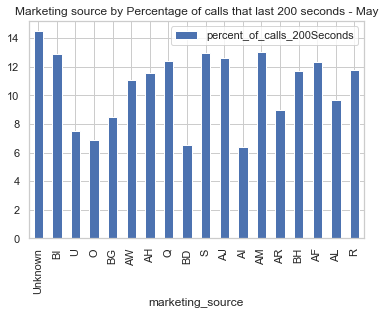

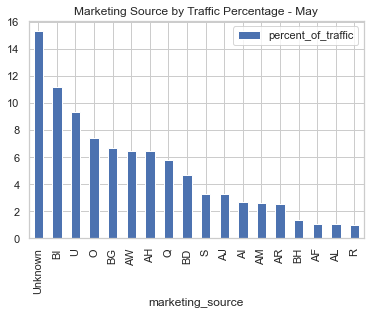

In [39]:
may_percent_callsPlot = may_data_mean.plot(y = ['percent_of_calls_200Seconds'], kind = 'bar',
                                           title = 'Marketing source by Percentage of calls that last 200 seconds - May')
may_data_mean.plot(y = ['percent_of_traffic'], kind = 'bar', title = 'Marketing Source by Traffic Percentage - May')

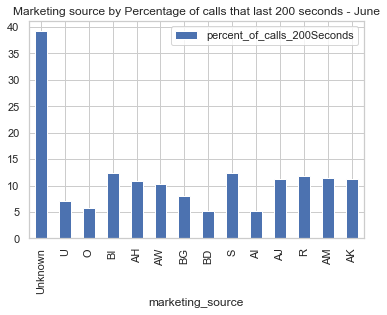

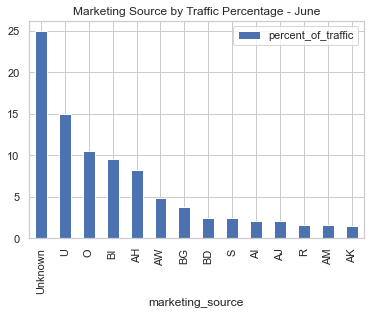

In [40]:
june_data_mean.plot(y = ['percent_of_calls_200Seconds'], kind = 'bar' ,
                    title = 'Marketing source by Percentage of calls that last 200 seconds - June')
june_data_mean.plot(y = ['percent_of_traffic'], kind = 'bar', title = 'Marketing Source by Traffic Percentage - June')


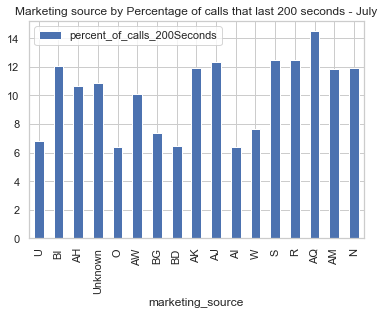

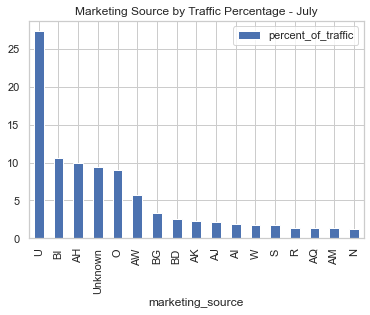

In [41]:
july_data_mean.plot(y = ['percent_of_calls_200Seconds'], kind = 'bar' ,
                    title = 'Marketing source by Percentage of calls that last 200 seconds - July')
july_data_mean.plot(y = ['percent_of_traffic'], kind = 'bar', title = 'Marketing Source by Traffic Percentage - July')

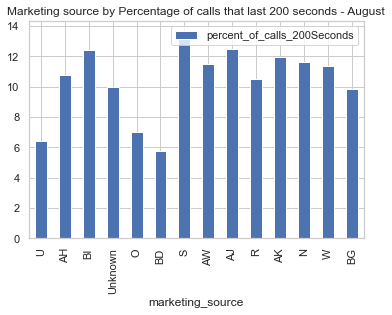

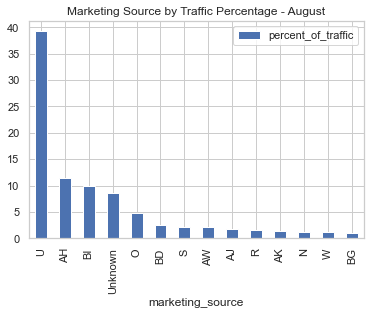

In [42]:
aug_data_mean.plot(y = ['percent_of_calls_200Seconds'], kind = 'bar' ,
                   title = 'Marketing source by Percentage of calls that last 200 seconds - August')
aug_data_mean.plot(y = ['percent_of_traffic'], kind = 'bar', title = 'Marketing Source by Traffic Percentage - August')

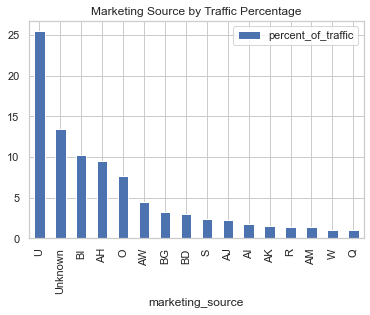

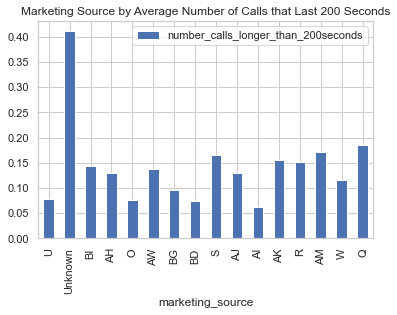

In [46]:
source_mean82.plot(y = ['percent_of_traffic'], kind = 'bar', title = 'Marketing Source by Traffic Percentage')

source_mean82.plot(y = ['number_calls_longer_than_200seconds'], kind = 'bar' ,
                   title = 'Marketing Source by Average Number of Calls that Last 200 Seconds')